# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.7, random_state=109, shuffle=True)

*your answer here*

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

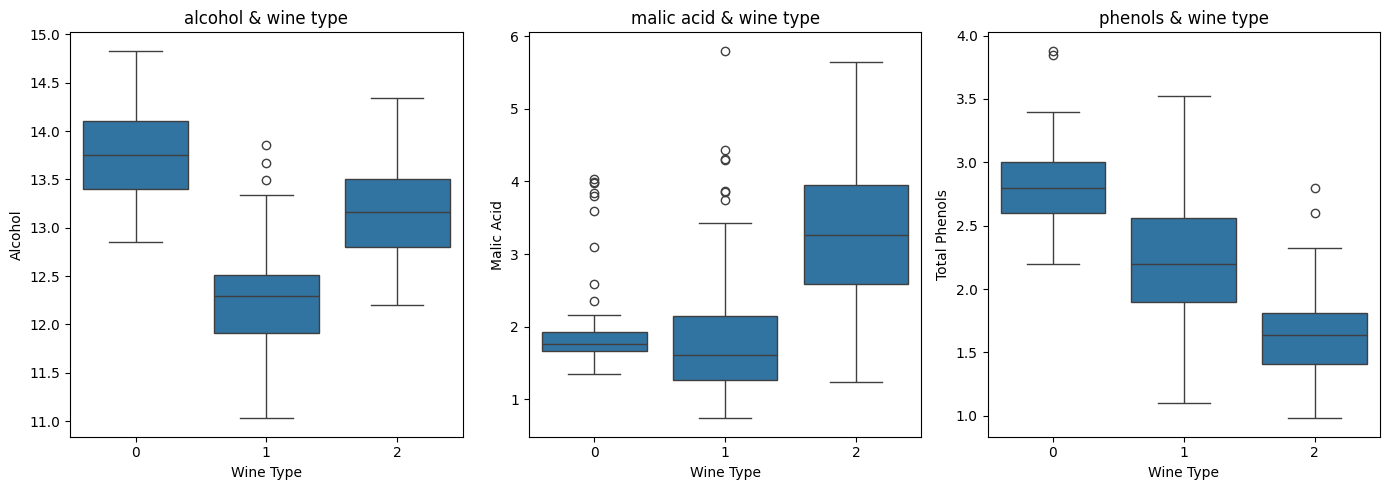

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.boxplot(x=y, y=X_full['alcohol'], ax=axes[0])
axes[0].set_title("alcohol & wine type")
axes[0].set_xlabel('Wine Type')
axes[0].set_ylabel('Alcohol')

sns.boxplot(x=y, y=X_full['malic_acid'], ax=axes[1])
axes[1].set_title('malic acid & wine type')
axes[1].set_xlabel('Wine Type')
axes[1].set_ylabel('Malic Acid')

sns.boxplot(x=y, y=X_full['total_phenols'], ax=axes[2])
axes[2].set_title("phenols & wine type")
axes[2].set_xlabel('Wine Type')
axes[2].set_ylabel('Total Phenols')

plt.tight_layout()
plt.show()

*your answer here*

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [10]:
X_train_subset = X_train[['alcohol', 'malic_acid']]
X_test_subset = X_test[['alcohol', 'malic_acid']]

y_train_binary = (y_train == 0).astype(int)
y_test_binary = (y_test == 0).astype(int)
binary_model = LogisticRegression(random_state=109)
binary_model.fit(X_train_subset, y_train_binary)

multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=109)
multi_model.fit(X_train_subset, y_train)

ovr_model = LogisticRegression(multi_class='ovr', random_state=109)
ovr_model.fit(X_train_subset, y_train)

print("binary indicator class 0:", binary_model.score(X_test_subset, y_test_binary))
print("multinomial:", multi_model.score(X_test_subset, y_test))
print("OvR logistic regression:", ovr_model.score(X_test_subset, y_test))


binary indicator class 0: 0.856
multinomial: 0.752
OvR logistic regression: 0.744


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


*your answer here*

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [18]:
logits = []
for i in range(3):
    logit = multi_model.intercept_[i] + np.sum(multi_model.coef_[i] * X_test_subset.iloc[0])
    logits.append(logit)

logits = np.array(logits)
probabilities = np.exp(logits) / np.sum(np.exp(logits))

for i, prob in enumerate(probabilities):
    print(f"Class {i}: {prob:.4f}")

Class 0: 0.5556
Class 1: 0.3006
Class 2: 0.1438


*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [20]:
proba_predictions = ovr_model.predict_proba(X_test_subset)
manual_predictions = np.argmax(proba_predictions, axis=1)
auto_predictions = ovr_model.predict(X_test_subset)

print("First 10 probability predictions:")
print(proba_predictions[:10])
print("\nFirst 10 manual predictions:", manual_predictions[:10])
print("First 10 automatic predictions:", auto_predictions[:10])

First 10 probability predictions:
[[0.53664823 0.34035064 0.12300113]
 [0.0912582  0.21542988 0.69331192]
 [0.17357907 0.80569557 0.02072536]
 [0.01004739 0.14204702 0.84790559]
 [0.30243837 0.00782505 0.68973657]
 [0.49138999 0.47502019 0.03358982]
 [0.33667332 0.59469305 0.06863363]
 [0.39300825 0.51955967 0.08743208]
 [0.12775447 0.83499665 0.03724888]
 [0.70163415 0.14679403 0.15157182]]

First 10 manual predictions: [0 2 1 2 2 0 1 1 1 0]
First 10 automatic predictions: [0 2 1 2 2 0 1 1 1 0]


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

In [21]:
proba = ovr_model.predict_proba(X_test_subset)
thresholds = [0.4, 0.35, 0.25]
custom_predictions = []
for prob in proba:
    if not any(p > thresholds[i] for i, p in enumerate(prob)):
        custom_predictions.append(np.argmax(prob))
    else:
        for i, (p, t) in enumerate(zip(prob, thresholds)):
            if p > t:
                custom_predictions.append(i)
                break

# Compare results
print("Original predictions:", ovr_model.predict(X_test_subset)[:10])
print("Custom threshold predictions:", custom_predictions[:10])

Original predictions: [0 2 1 2 2 0 1 1 1 0]
Custom threshold predictions: [0, 2, 1, 2, 2, 0, 1, 1, 1, 0]


*your answer here*

**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [25]:
train_acc_multi = multi_model.score(X_train_subset, y_train)
train_acc_ovr = ovr_model.score(X_train_subset, y_train)

test_acc_multi = multi_model.score(X_test_subset, y_test)
test_acc_ovr = ovr_model.score(X_test_subset, y_test)

print("multinomial")
print(train_acc_multi)
print(test_acc_multi)
print(train_acc_multi - test_acc_multi)
print("\nOvR")
print(train_acc_ovr)
print(test_acc_ovr)
print(train_acc_ovr - test_acc_ovr)

multinomial
0.7735849056603774
0.752
0.021584905660377407

OvR
0.7924528301886793
0.744
0.0484528301886793


*your answer here*

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


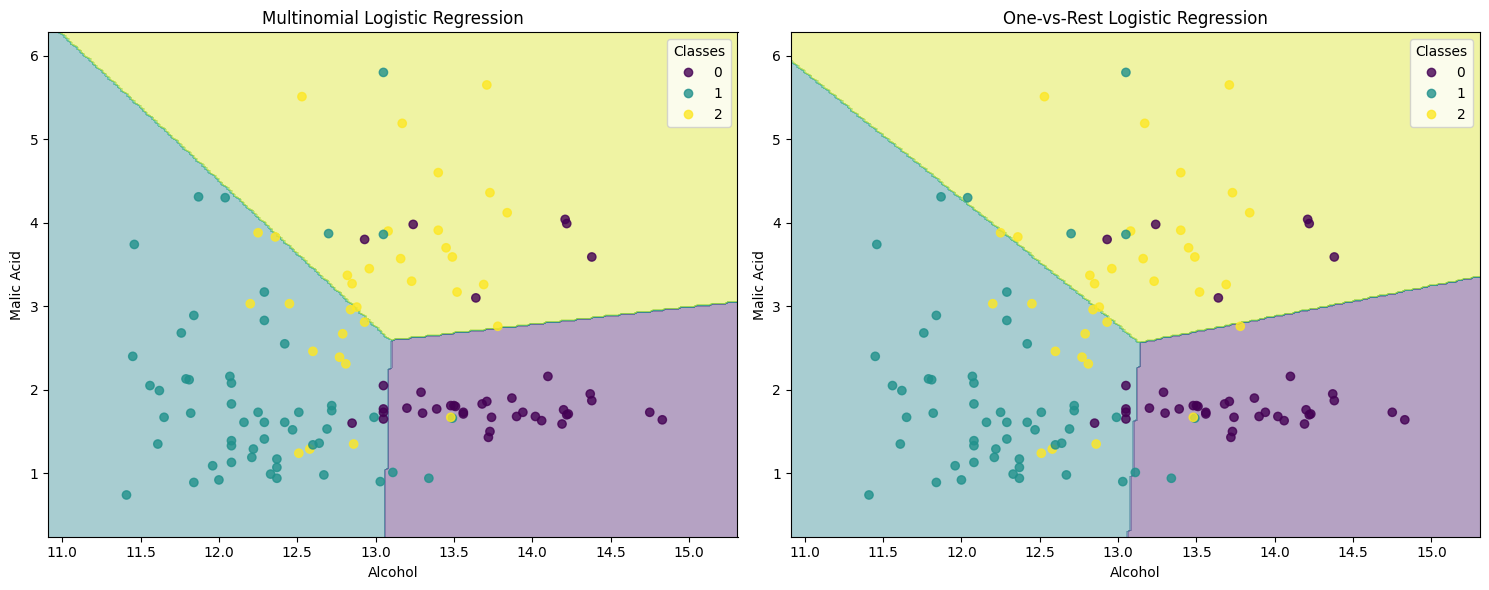

In [26]:
x_min, x_max = X_test_subset['alcohol'].min() - 0.5, X_test_subset['alcohol'].max() + 0.5
y_min, y_max = X_test_subset['malic_acid'].min() - 0.5, X_test_subset['malic_acid'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

Z = multi_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax1.contourf(xx, yy, Z, alpha=0.4)
scatter = ax1.scatter(X_test_subset['alcohol'], X_test_subset['malic_acid'], c=y_test, alpha=0.8)
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
ax1.set_title('Multinomial Logistic Regression')
ax1.legend(*scatter.legend_elements(), title="Classes")

Z = ovr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.4)
scatter = ax2.scatter(X_test_subset['alcohol'], X_test_subset['malic_acid'], c=y_test, alpha=0.8)
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic Acid')
ax2.set_title('One-vs-Rest Logistic Regression')
ax2.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

*your answer here*

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


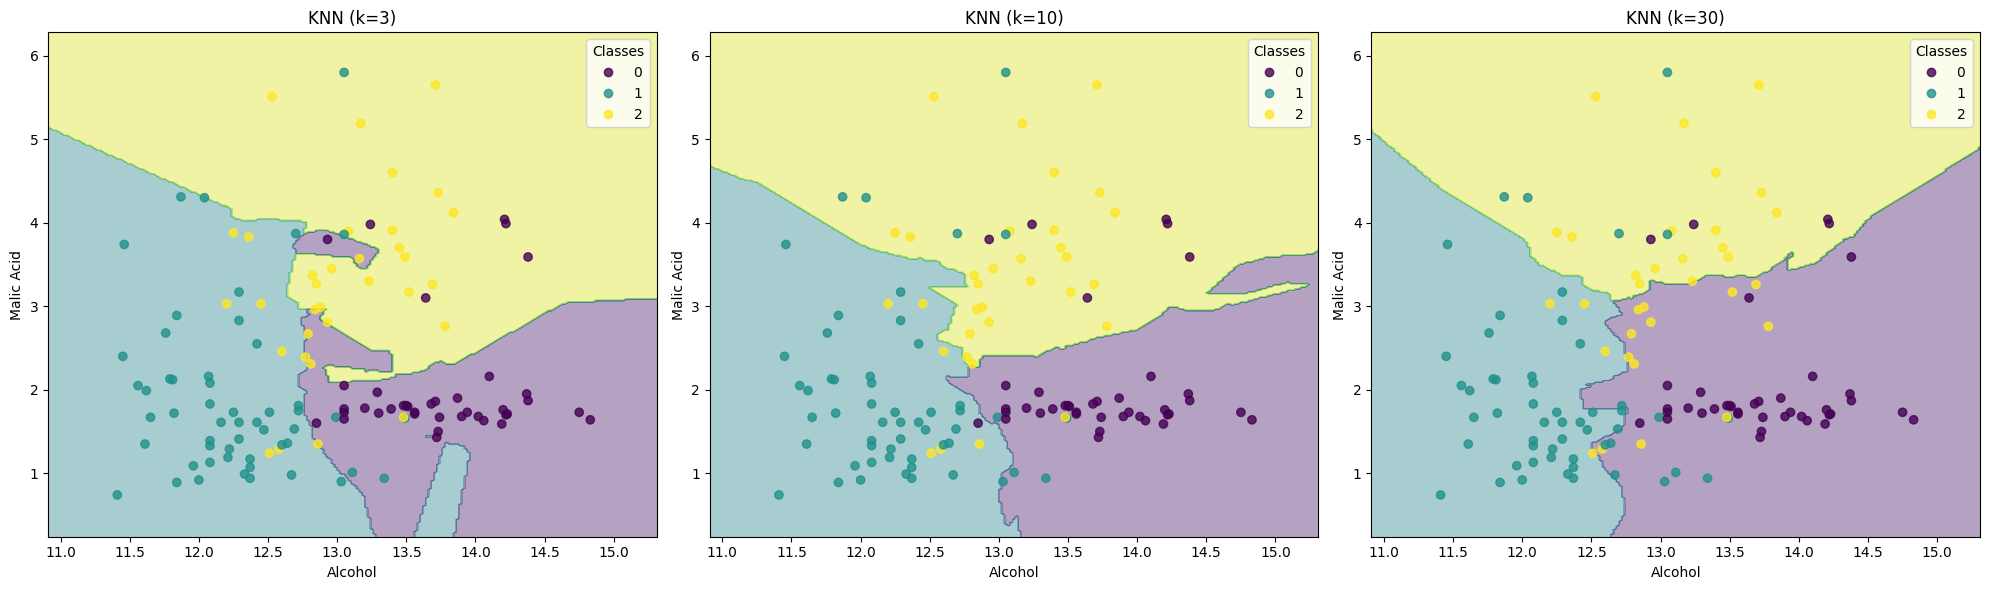

KNN k=3 accuracy: 0.8
KNN k=10 accuracy: 0.808
KNN k=30 accuracy: 0.728


In [28]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_30 = KNeighborsClassifier(n_neighbors=30)

for model in [knn_3, knn_10, knn_30]:
    model.fit(X_train_subset, y_train)

x_min, x_max = X_test_subset['alcohol'].min() - 0.5, X_test_subset['alcohol'].max() + 0.5
y_min, y_max = X_test_subset['malic_acid'].min() - 0.5, X_test_subset['malic_acid'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
models = [(knn_3, '3'), (knn_10, '10'), (knn_30, '30')]

for ax, (model, k) in zip(axes, models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X_test_subset['alcohol'], X_test_subset['malic_acid'], 
                        c=y_test, alpha=0.8)
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_title(f'KNN (k={k})')
    ax.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

for model, k in models:
    print(f"KNN k={k} accuracy:", model.score(X_test_subset, y_test))

*your answer here*

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


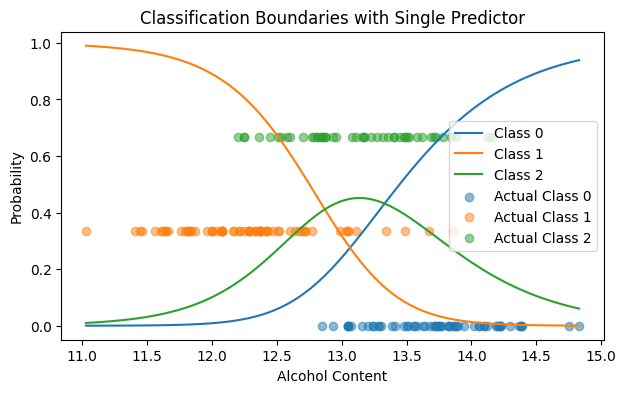

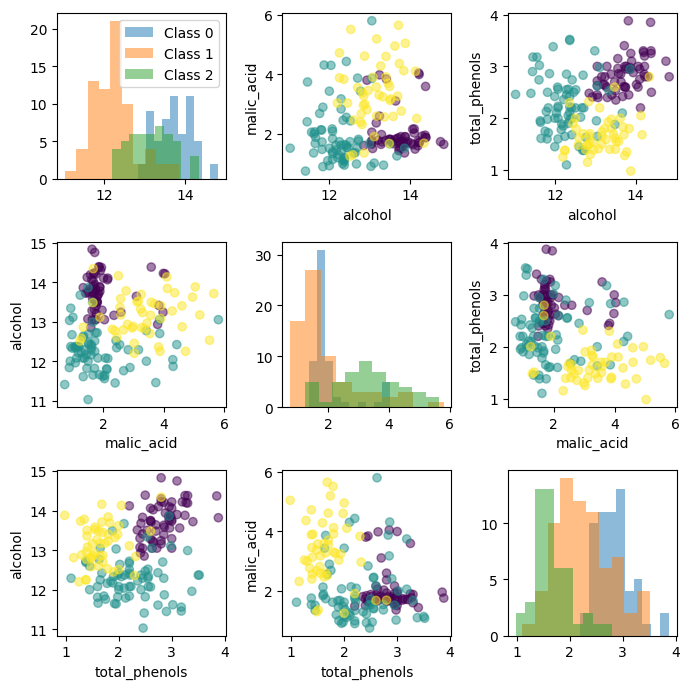

In [39]:
plt.figure(figsize=(7, 4))
X_single = X_full[['alcohol']]
single_model = LogisticRegression(multi_class='multinomial', random_state=109)
single_model.fit(X_single, y)

x_range = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
y_pred_proba = single_model.predict_proba(x_range)

plt.plot(x_range, y_pred_proba[:, 0], label='Class 0')
plt.plot(x_range, y_pred_proba[:, 1], label='Class 1')
plt.plot(x_range, y_pred_proba[:, 2], label='Class 2')
for i in range(3):
    mask = y == i
    plt.scatter(X_single[mask], [i/3] * sum(mask), label=f'Actual Class {i}', alpha=0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Probability')
plt.title('Classification Boundaries with Single Predictor')
plt.legend()
plt.show()

selected_features = ['alcohol', 'malic_acid', 'total_phenols']
fig, axes = plt.subplots(len(selected_features), len(selected_features), figsize=(7,7))

for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        if i != j:
            axes[i,j].scatter(X_full[feature1], X_full[feature2], c=y, alpha=0.5)
            axes[i,j].set_xlabel(feature1)
            axes[i,j].set_ylabel(feature2)
        else:
            axes[i,i].hist(X_full[feature1][y == 0], alpha=0.5, label='Class 0')
            axes[i,i].hist(X_full[feature1][y == 1], alpha=0.5, label='Class 1')
            axes[i,i].hist(X_full[feature1][y == 2], alpha=0.5, label='Class 2')
            if i == 0:
                axes[i, i].legend()
plt.tight_layout()
plt.show()